In [35]:
# generate random floating point values
from random import seed
from random import random
from random import randint
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter
from itertools import chain
from collections import OrderedDict

In [36]:
nodes=[i for i in range(1,7)]
pairs = list(combinations(nodes, 2))
print(pairs)

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 3), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 5), (4, 6), (5, 6)]


In [37]:
n=len(nodes)
p=0.38
edge_list=list()

for i in pairs:
    gen_prob=randint(0,1)
    if gen_prob<p:
        edge_list.append(i)
    else:
        pass
print(edge_list)


[(1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 6)]


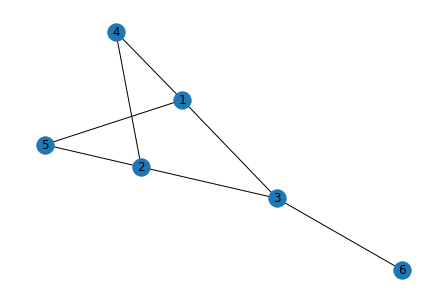

In [38]:
G = nx.Graph()

G.add_nodes_from(list(nodes))
G.add_edges_from(edge_list)

plt.figure()
nx.draw(G, with_labels=True)
plt.show()

{1: 3, 3: 3, 4: 2, 5: 2, 2: 3, 6: 1}


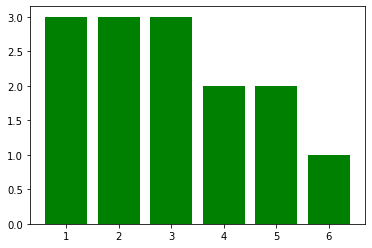

In [39]:
EdgeList = [i for j in edge_list for i in j]
def countX(EdgeList, x):
    return EdgeList.count(x)
dict_degree ={}

for x in EdgeList:
    case = {x:countX(EdgeList, x)}
    dict_degree.update(case)
#dict_degree = OrderedDict(sorted(dict_degree.items()))    
print(dict_degree)

plt.bar(dict_degree.keys(), dict_degree.values(), color='g')
plt.show()

{1: 3, 3: 3, 4: 2, 5: 2, 2: 3, 6: 1}
[3, 3, 2, 2, 3, 1]
{3: 3, 2: 2, 1: 1}
dict_keys([3, 2, 1])


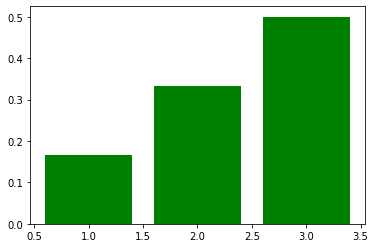

In [40]:
#degree distribution
print(dict_degree)
degrees = dict_degree.values()

degrees_list = list(degrees) 
print(degrees_list)

dict_degrees = {}
for x in degrees_list:
    case = {x:countX(degrees_list, x)}
    dict_degrees.update(case)
print(dict_degrees)

probs = list()
for key, value in dict_degrees.items(): 
    probs.append(value/n)
#print(probs)

numdegrees = dict_degrees.keys()
print(numdegrees)

plt.bar(numdegrees,probs,color='g')
plt.show()


In [41]:
#Theoretical average degree 
#In an undirected network the total number of links, L, can be expressed as the sum of the node degrees 
#divided by two. 
total_degrees = sum(degrees_list)
L = total_degrees*(1/2)
print("Total number of links is", L)
k = (2*L)/n #average degree
print("Theoretical average degree is", k)

#Empirical average degree 

#Empirical variance of the degree


Total number of links is 7.0
Theoretical average degree is 2.3333333333333335
